       Issue_Size(crores)         QIB         HNI         RII  Issue_price  \
count          288.000000  288.000000  288.000000  288.000000   288.000000   
mean          1118.383750   24.834688   71.413646    8.341181   368.913194   
std           2160.932743   37.837647  142.500596   14.159700   361.287606   
min              0.000000    0.000000    0.000000    0.000000     0.000000   
25%            156.142500    1.147500    1.210000    1.367500   113.750000   
50%            474.000000    4.810000    5.075000    3.405000   242.500000   
75%           1049.480000   35.492500   73.295000    8.535000   522.500000   
max          18915.900000  176.850000  958.070000  119.440000  2150.000000   

       Listing_Open  Listing_Close  Listing_Gains(%)          CMP  \
count    288.000000     288.000000        288.000000   288.000000   
mean     438.374653     396.502917          5.993056   661.911076   
std      458.703932     439.609061         49.354577  1082.712268   
min        9.500000  

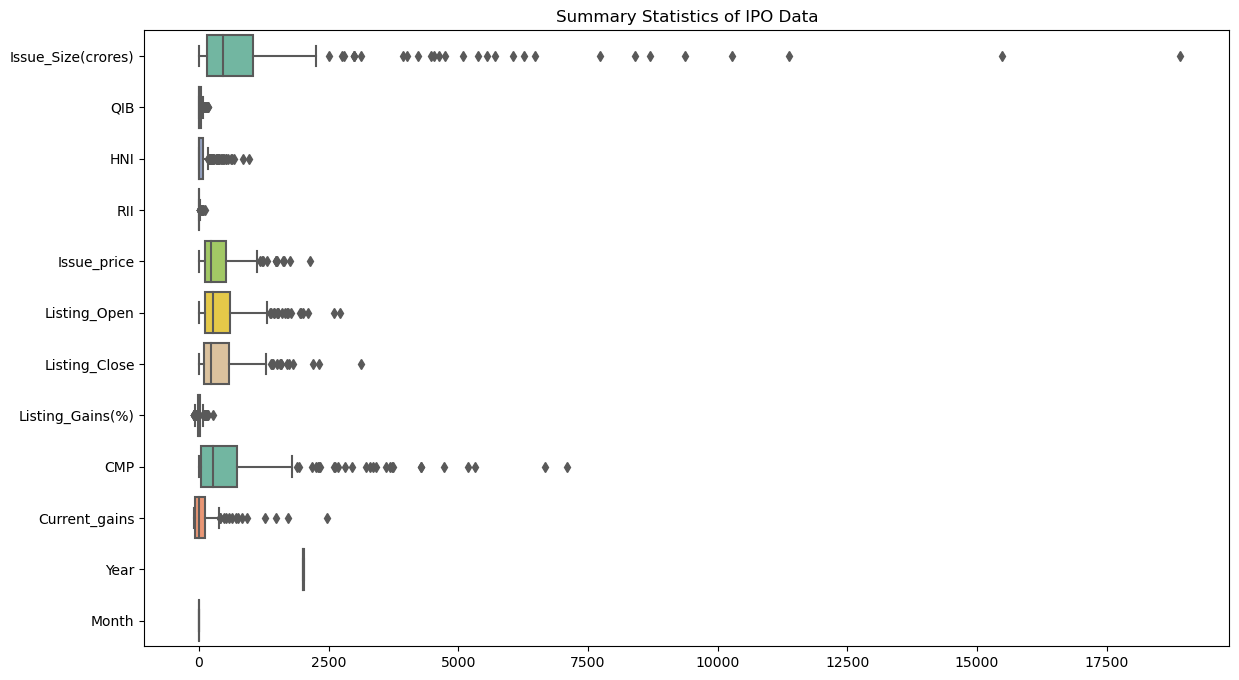

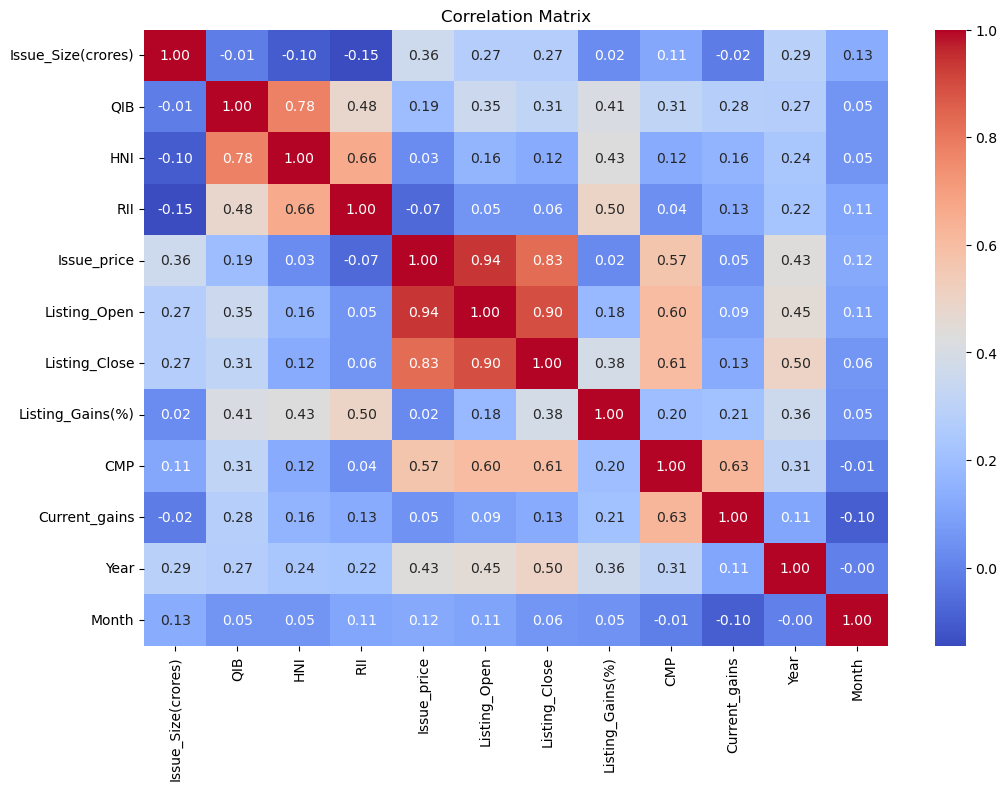

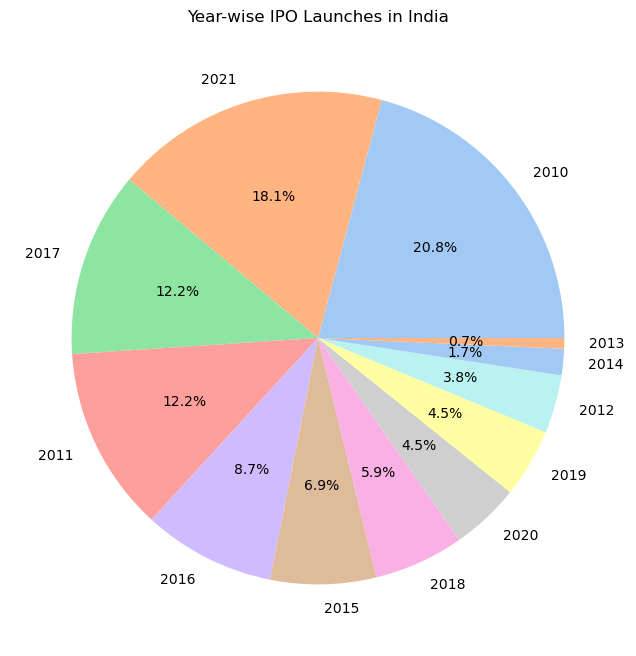

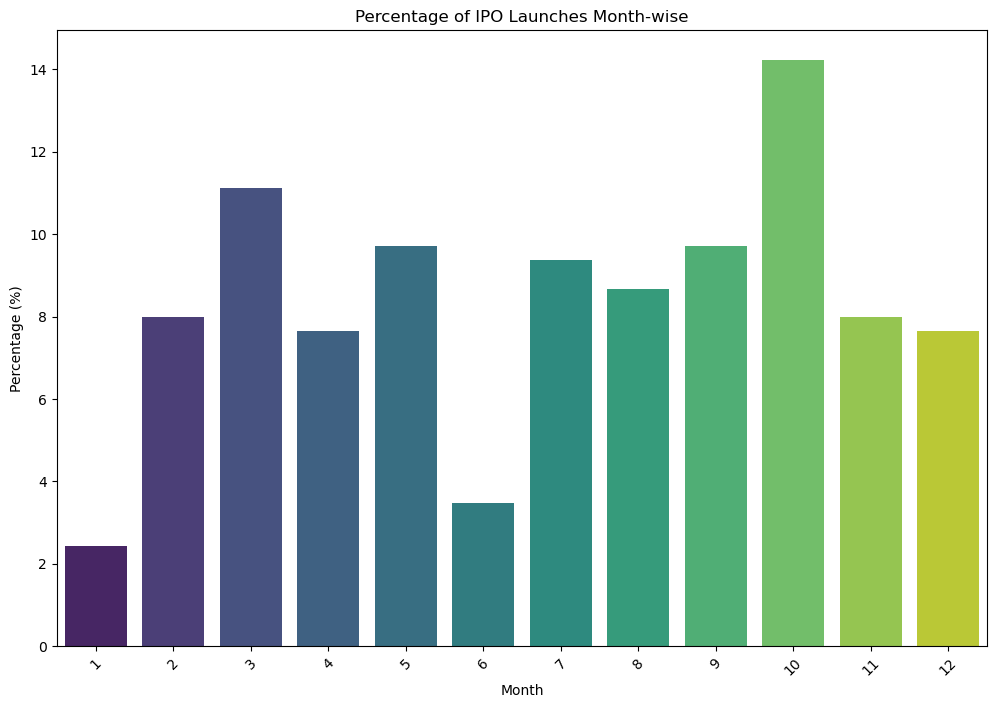

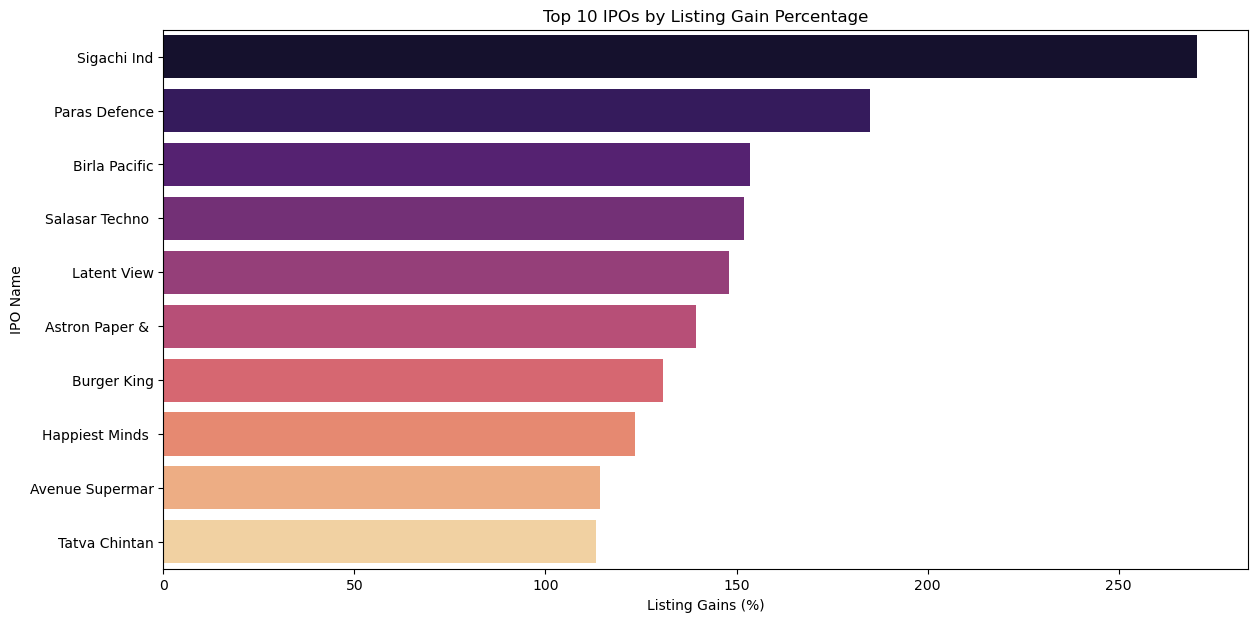

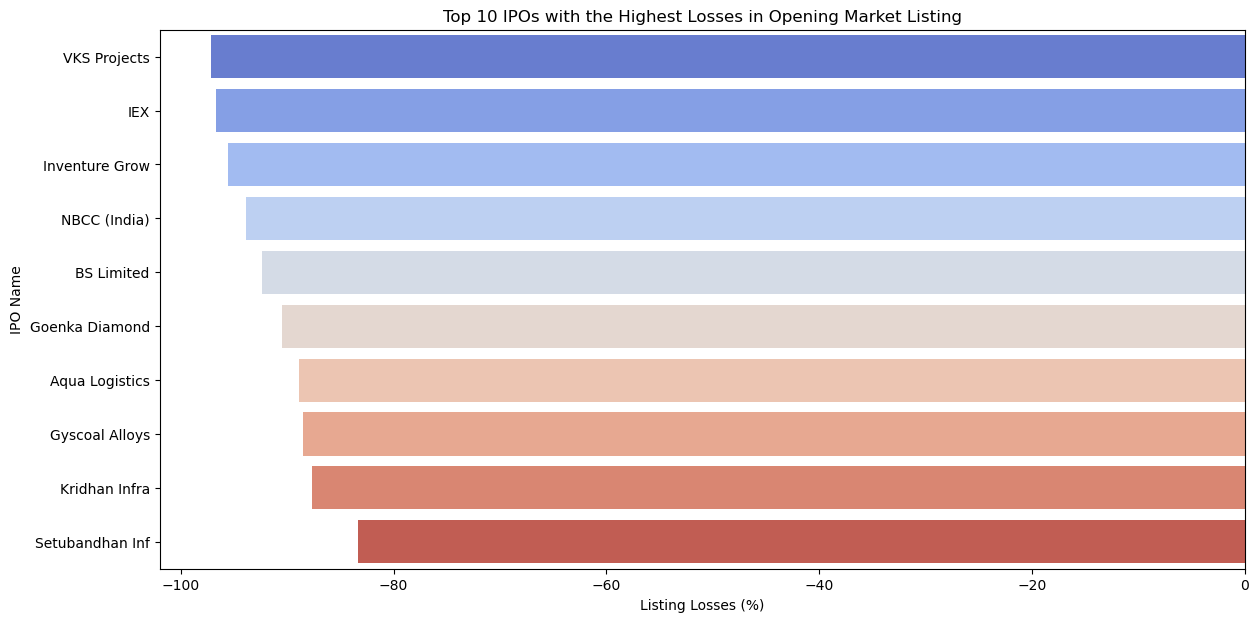

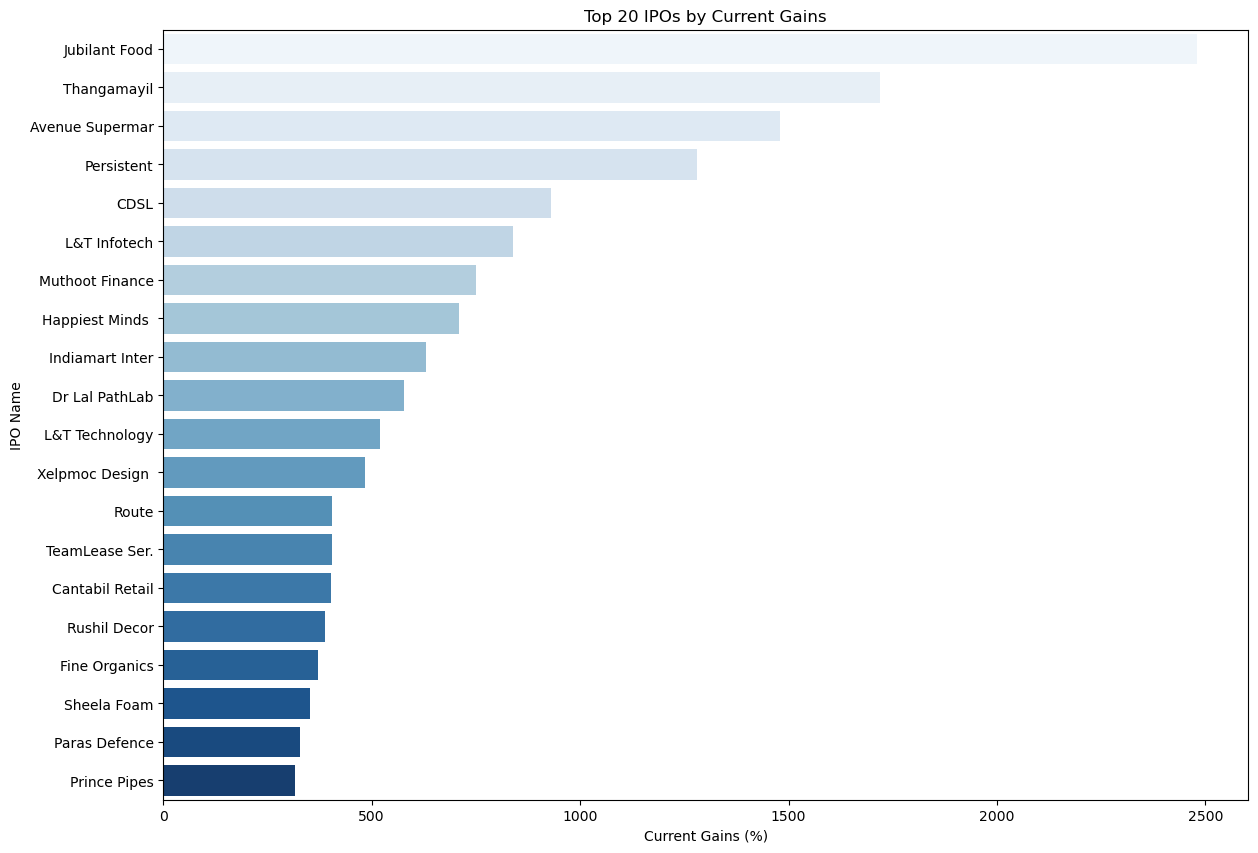

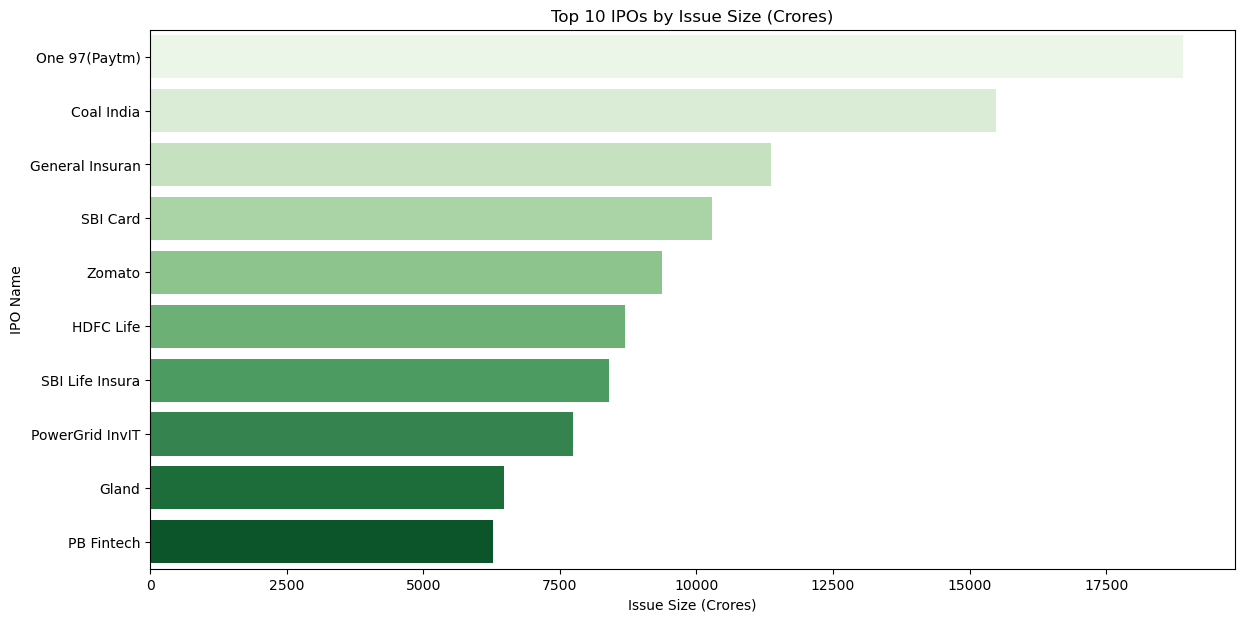

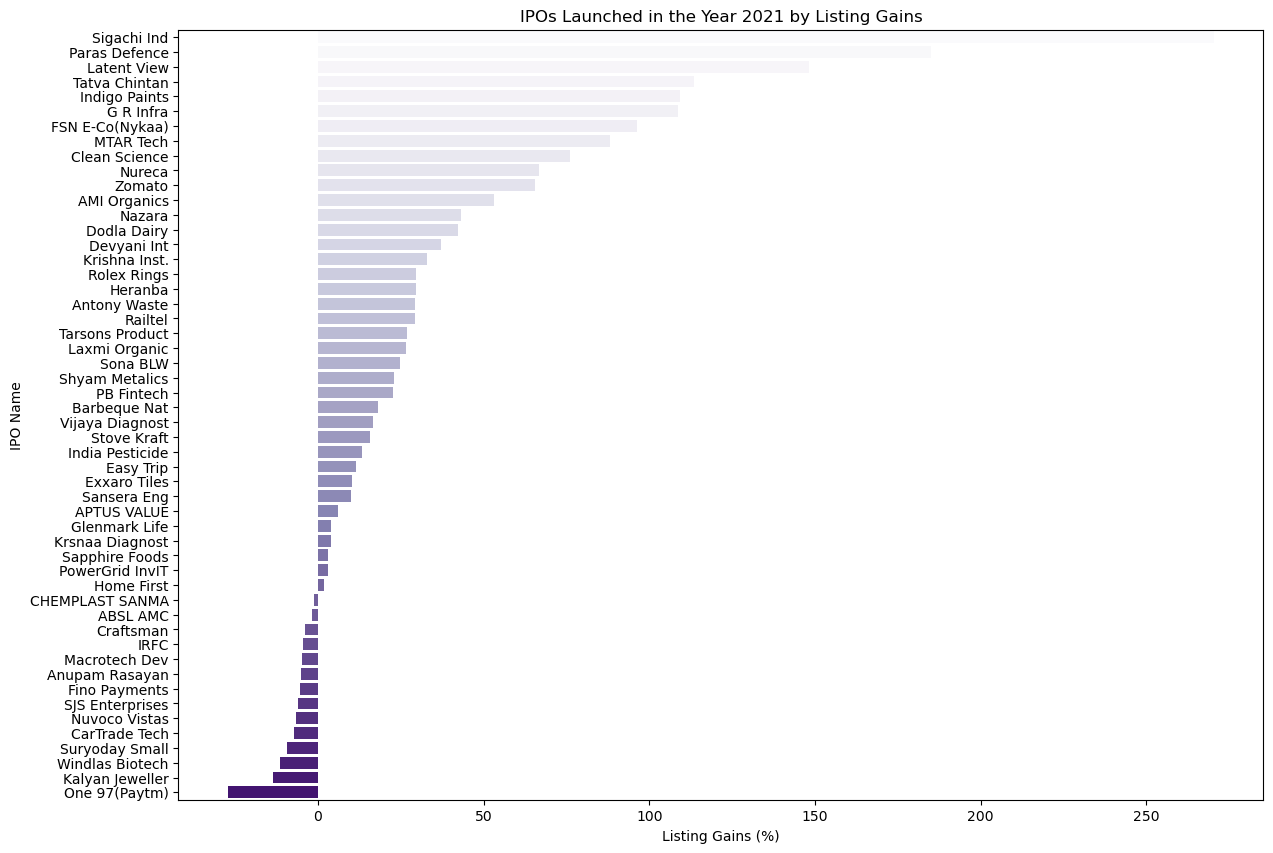

Mean Squared Error: 2111.2927347812833
R-squared: 0.2807648086668647


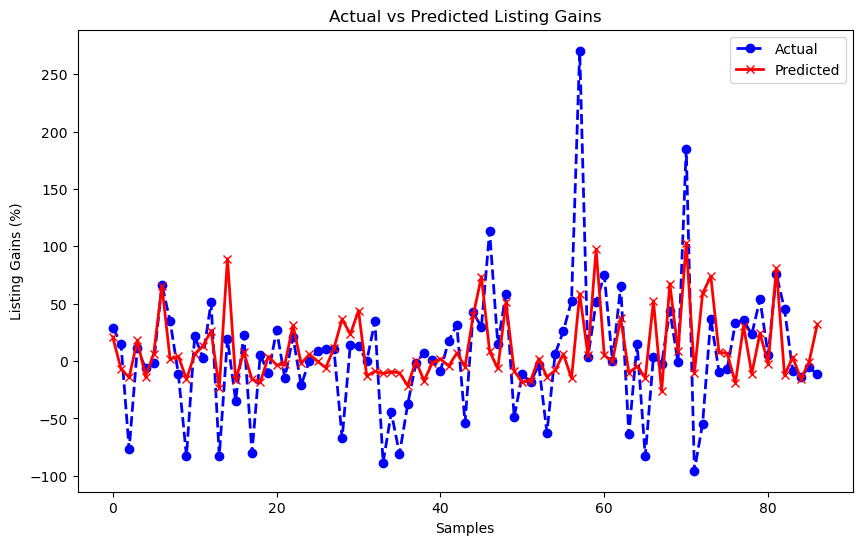

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = r"C:\Users\Vaibhav\Desktop\Data Science\Data analysis project\Stock_market_prediction\IPO.csv"
ipo_data = pd.read_csv(file_path)

# Data Cleaning
ipo_data['Date'] = pd.to_datetime(ipo_data['Date'], format='%d-%m-%y')
ipo_data['CMP'] = ipo_data['CMP'].str.replace(',', '').astype(float)
ipo_data['Current_gains'].fillna(ipo_data['Current_gains'].mean(), inplace=True)

# Additional Features for Prediction
ipo_data['Year'] = ipo_data['Date'].dt.year
ipo_data['Month'] = ipo_data['Date'].dt.month

# 1. Describe the Data
describe_data = ipo_data.describe()
print(describe_data)

plt.figure(figsize=(14, 8))
sns.boxplot(data=ipo_data.select_dtypes(include=[np.number]), orient="h", palette="Set2")
plt.title("Summary Statistics of IPO Data")
plt.show()

# 2. Heatmap of Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(ipo_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 3. Pie Chart of Year-wise IPO Launches in India
yearly_ipo_count = ipo_data['Year'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(yearly_ipo_count, labels=yearly_ipo_count.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Year-wise IPO Launches in India')
plt.show()

# 4. Percentage of IPO Launches Month-wise
monthly_ipo_count = ipo_data['Month'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 8))
sns.barplot(x=monthly_ipo_count.index, y=monthly_ipo_count.values, palette='viridis')
plt.title('Percentage of IPO Launches Month-wise')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()

# 5. Grouping IPOs by Top Listing Gain Percentage
top_listing_gains = ipo_data.sort_values(by='Listing_Gains(%)', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x='Listing_Gains(%)', y='IPO_Name', data=top_listing_gains, palette='magma')
plt.title('Top 10 IPOs by Listing Gain Percentage')
plt.xlabel('Listing Gains (%)')
plt.ylabel('IPO Name')
plt.show()

# 6. Top Losers in the Opening Market Listing
top_losers = ipo_data.sort_values(by='Listing_Gains(%)').head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x='Listing_Gains(%)', y='IPO_Name', data=top_losers, palette='coolwarm')
plt.title('Top 10 IPOs with the Highest Losses in Opening Market Listing')
plt.xlabel('Listing Losses (%)')
plt.ylabel('IPO Name')
plt.show()

# 7. Top 20 Current Top Gainers
top_current_gainers = ipo_data.sort_values(by='Current_gains', ascending=False).head(20)

plt.figure(figsize=(14, 10))
sns.barplot(x='Current_gains', y='IPO_Name', data=top_current_gainers, palette='Blues')
plt.title('Top 20 IPOs by Current Gains')
plt.xlabel('Current Gains (%)')
plt.ylabel('IPO Name')
plt.show()

# 8. Grouping Top IPOs Based on Issue Size
top_issue_size = ipo_data.sort_values(by='Issue_Size(crores)', ascending=False).head(10)

plt.figure(figsize=(14, 7))
sns.barplot(x='Issue_Size(crores)', y='IPO_Name', data=top_issue_size, palette='Greens')
plt.title('Top 10 IPOs by Issue Size (Crores)')
plt.xlabel('Issue Size (Crores)')
plt.ylabel('IPO Name')
plt.show()

# 9. IPOs Launched in the Year 2021
ipos_2021 = ipo_data[ipo_data['Year'] == 2021]

plt.figure(figsize=(14, 10))
sns.barplot(x='Listing_Gains(%)', y='IPO_Name', data=ipos_2021.sort_values(by='Listing_Gains(%)', ascending=False), palette='Purples')
plt.title('IPOs Launched in the Year 2021 by Listing Gains')
plt.xlabel('Listing Gains (%)')
plt.ylabel('IPO Name')
plt.show()

# 10. Predictive Analysis: Predicting Listing Gains

# Prepare the data for modeling with additional features
features = ['Issue_Size(crores)', 'QIB', 'HNI', 'RII', 'Issue_price', 'Year', 'Month']
X = ipo_data[features]
y = ipo_data['Listing_Gains(%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualization of Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue', marker='o', linestyle='dashed', linewidth=2)
plt.plot(y_pred, label='Predicted', color='red', marker='x', linestyle='solid', linewidth=2)
plt.title('Actual vs Predicted Listing Gains')
plt.xlabel('Samples')
plt.ylabel('Listing Gains (%)')
plt.legend()
plt.show()
